In [1]:
#This is a study about the caracteristics of several Data Analysts Jobs,in different companies located in the United States of America. 
#This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:
# - Job Title
# - Salary Estimate
# - Job Description
# - Rating
# - Company Name
# - Location
# - Headquarters
# - Size
# - Founded
# - Type of ownership
# - Industry
# - Sector
# - Revenue
# - Competitors
# - Easy Apply

#In the following Jupyter Notebook, I will first answer the question : 
# "What are the best jobs title in order to get the best salary in Data Analysis ?"
# "Which features are coorelated with the amount of salary a data analyst can have ?""

#This dataset comes from the year 2020, which makes this analysis obselete. The purpose of this case study
#remains purely theoritical.

#First I imported the data and take a quick look at the dataset provided.

import pandas as pd
data = pd.read_csv('DataAnalyst.csv')
display(data.head())


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [2]:
#Then I dropped the column "Unnamed" which is irrelevant for our analysis. I also dropped the row
#where there was only missing values.
data=data.dropna()
data=data.drop('Unnamed: 0',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2252 non-null   object 
 1   Salary Estimate    2252 non-null   object 
 2   Job Description    2252 non-null   object 
 3   Rating             2252 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2252 non-null   object 
 6   Headquarters       2252 non-null   object 
 7   Size               2252 non-null   object 
 8   Founded            2252 non-null   int64  
 9   Type of ownership  2252 non-null   object 
 10  Industry           2252 non-null   object 
 11  Sector             2252 non-null   object 
 12  Revenue            2252 non-null   object 
 13  Competitors        2252 non-null   object 
 14  Easy Apply         2252 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.5+ KB


In [3]:
#In order to answer the first question : "What are the best jobs title in order to get the best salary in Data Analysis?"
#We have to first take a look at the several jobs present in the dataset.
nb_job_title = data['Job Title'].value_counts()[:30]
nb_job_title

Data Analyst                               404
Senior Data Analyst                         90
Junior Data Analyst                         30
Business Data Analyst                       28
Sr. Data Analyst                            21
Data Analyst Junior                         17
Data Analyst II                             17
Data Quality Analyst                        17
Data Governance Analyst                     16
Lead Data Analyst                           15
Data Reporting Analyst                      13
Financial Data Analyst                      12
Data Analyst I                              11
Data Analyst III                            11
Marketing Data Analyst                       9
Sr Data Analyst                              9
Data Management Analyst                      8
Data Warehouse Analyst                       8
Data Science Analyst                         7
Technical Data Analyst                       7
SQL Data Analyst                             7
Research Data

In [4]:
#We replace the values 'Sr. Data Analyst' and 'Sr Data Analyst' by 'Senior Data Analyst' in order to regroup them.
#We replace also the value 'Data Analyst Junior' by 'Junior Data Analyst' for the same purpose
data['Job Title']=data['Job Title'].replace(['Sr. Data Analyst','Sr Data Analyst'],'Senior Data Analyst')
data['Job Title']=data['Job Title'].replace('Data Analyst Junior','Junior Data Analyst')
data['Job Title'].value_counts()[:30]

Data Analyst                               404
Senior Data Analyst                        120
Junior Data Analyst                         47
Business Data Analyst                       28
Data Quality Analyst                        17
Data Analyst II                             17
Data Governance Analyst                     16
Lead Data Analyst                           15
Data Reporting Analyst                      13
Financial Data Analyst                      12
Data Analyst I                              11
Data Analyst III                            11
Marketing Data Analyst                       9
Data Management Analyst                      8
Data Warehouse Analyst                       8
SQL Data Analyst                             7
Data Science Analyst                         7
Technical Data Analyst                       7
Clinical Data Analyst                        6
Research Data Analyst                        6
Data Security Analyst                        6
Healthcare Da

In [5]:
#Then we keep only the rows where the Salary Estimate is not equal to -1,
data = data.loc[data['Salary Estimate'] != '-1']
data['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$42K-$63K (Glassdoor est.)     4
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: Salary Estimate, Length: 89, dtype: int64

In [6]:
#As is, the column 'Salary Estimate' can't be used for the analysis, we have to transform it into a numerical feature
#in order to be able to use it.

list1=[]
list2=[]
se=data['Salary Estimate']
for i in se:
    if i[4] == 'K':
        j = int(i[1:4])
    else :
        j = int(i[1:3])
    list1.append(j)
    if i[8] == 'K':
        k = i[6:8]
    elif i[9] == 'K' :
        k = i[6:9]
    else :
        k = i[7:10]
    list2.append(k)

#We extracted the first and the last value of each salary estimate, and put them into two seperate lists. 
#Then for the analysis, we created a new numerical column called 'Numerical Salary Estimate (in thousands)'
#which represent the sum of the first value and the last value of each salary estimate, divided by two.


In [7]:
s1 = pd.Series(list1)
s2 = pd.Series(list2).astype('int')
s3 = (s2+s1)/2
s3

0       51.5
1       51.5
2       51.5
3       51.5
4       51.5
        ... 
2246    91.0
2247    91.0
2248    91.0
2249    91.0
2250    91.0
Length: 2251, dtype: float64

In [8]:
#Here we can see the transformation more clearly
data['Numerical Salary Estimate (in thousands)']=s3
data[['Salary Estimate','Numerical Salary Estimate (in thousands)']]


,Salary Estimate,Numerical Salary Estimate (in thousands)
0,$37K-$66K (Glassdoor est.),51.5
1,$37K-$66K (Glassdoor est.),51.5
2,$37K-$66K (Glassdoor est.),51.5
3,$37K-$66K (Glassdoor est.),51.5
4,$37K-$66K (Glassdoor est.),51.5
...,...,...
2248,$78K-$104K (Glassdoor est.),91.0
2249,$78K-$104K (Glassdoor est.),91.0
2250,$78K-$104K (Glassdoor est.),91.0
2251,$78K-$104K (Glassdoor est.),NaN


In [9]:
#Now we can create a function in order to clean the 'Company Name' column, since most names have extra characters. 
def clean(company):
    if len(company) > 2 and company[-2]=='.':
        company=company[:-4]
    return company
clean('IBM\n5.8')

'IBM'

In [10]:
data['Company Name']=data['Company Name'].apply(lambda i : clean(i))
data['Company Name'].value_counts()

Staffigo Technical Services, LLC             58
Diverse Lynx                                 22
Kforce                                       19
Lorven Technologies Inc                      19
Mondo                                        14
                                             ..
Fast Switch, LTD                              1
El Hogar del Nino - The Home of the Child     1
Empire Today                                  1
Numerator                                     1
SCL Health                                    1
Name: Company Name, Length: 1501, dtype: int64

In [11]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Numerical Salary Estimate (in thousands)
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,51.5
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,51.5
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,51.5


In [12]:
#If we take a look at the Mean Salary for each Job Title, we can see at first glance what are the best paid jobs in
# Data Analytics.
Mean_salary_per_job_title = data.groupby('Job Title')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)
Job_title_Top_ten_mean_salary = Mean_salary_per_job_title[:10]
Job_title_Top_ten_mean_salary

Job Title
Senior Data Analyst Studio Finance Engineering    150.0
Tableau Data Analyst Intern                       150.0
Sr. Data Analyst - Growth & Adoption              150.0
Data Analyst, Autonomy Operations                 150.0
AI Insights Data Analyst                          150.0
Data Analyst, Product Insights                    150.0
Data Analyst (SQL, Hive)                          150.0
Data Analyst with Data Mapping and API            150.0
Senior HR Data Analyst                            150.0
Business Intelligence Data Modeler/Analyst        138.5
Name: Numerical Salary Estimate (in thousands), dtype: float64

In [13]:
#But when we count the present values in the dataframe for each job title, we realize that most of them are only present
#once in the dataset, due to their precise description. We can therefore list what are the ten most common jobs
#present in the dataset, in order to realize our analysis.
Ten_most_common_jobs=data['Job Title'].value_counts()[:10]
Ten_most_common_jobs

Data Analyst               404
Senior Data Analyst        120
Junior Data Analyst         47
Business Data Analyst       28
Data Quality Analyst        17
Data Analyst II             17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Name: Job Title, dtype: int64

In [14]:
data_ten_most_common_jobs=data[data['Job Title'].isin(Ten_most_common_jobs.index.values)]
data_ten_most_common_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Numerical Salary Estimate (in thousands)
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5
5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,51.5
8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1,51.5
10,Data Analyst,$37K-$66K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,4.0,NYU Langone Health,"New York, NY","New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",-1,51.5
11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,-1.0,BulbHead,"Fairfield, NJ",-1,1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,51.5


In [15]:
#Here is the list of the mean salary of the ten most common jobs in the dataset
Mean_salary_ten_most_common_jobs=data_ten_most_common_jobs.groupby('Job Title')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)
Mean_salary_ten_most_common_jobs

Job Title
Lead Data Analyst          80.800000
Business Data Analyst      75.607143
Data Analyst               72.548267
Senior Data Analyst        71.358333
Data Quality Analyst       68.823529
Data Governance Analyst    68.718750
Financial Data Analyst     68.000000
Data Analyst II            65.235294
Junior Data Analyst        63.372340
Data Reporting Analyst     62.923077
Name: Numerical Salary Estimate (in thousands), dtype: float64

(40.0, 90.0)

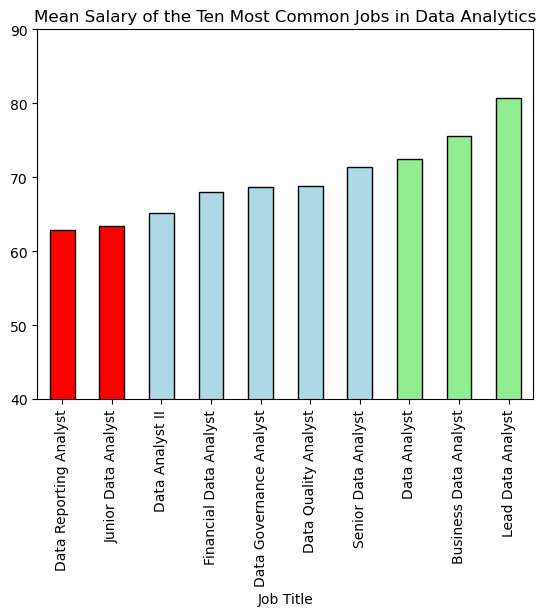

In [16]:
#We can also plot it into a histogram, in order to make esaier comparisons
import matplotlib.pyplot as plt
Mean_salary_ten_most_common_jobs.sort_values().plot(kind='bar',color=['red','red','lightblue','lightblue','lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen'],ec='black')
plt.title('Mean Salary of the Ten Most Common Jobs in Data Analytics')
plt.ylim(40,90)

In [17]:
#It seems like the three jobs who have the best salary in data analysis are Lead Data Analyst, Business Data Analyst and 
#Data Analyst. However, one can wonder why, on average, Senior Data Analyst have a lower salary than Data Analyst in
#this dataset.
#In the ten most commun jobs present in the dataset, the most present one was Data Analyst (404 observations), this is
#why I decided to do a more precise analysis on this particular Job Title.
data_DA=data.loc[data['Job Title'] == 'Data Analyst']
display(data_DA.head())

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Numerical Salary Estimate (in thousands)
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5
5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,51.5
8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1,51.5
10,Data Analyst,$37K-$66K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,4.0,NYU Langone Health,"New York, NY","New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",-1,51.5
11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,-1.0,BulbHead,"Fairfield, NJ",-1,1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,51.5


Text(0.5, 1.0, 'Divided into 30 groups')

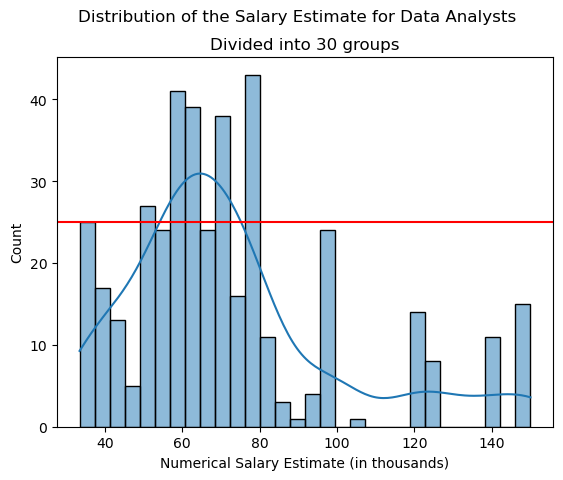

In [18]:
#Here is a histogram with the repartition of the Salary Estimate for the Data Analyst Job. We can observe that most
#of the salaries are between 60K and 80k per year.
#The redline highlights the bars with a value above 25.

import seaborn as sns
import matplotlib.pyplot as plt
g=sns.histplot(data_DA['Numerical Salary Estimate (in thousands)'],bins=30,kde=True)
plt.axhline(y = 25, color = 'r', linestyle = '-')
plt.suptitle('Distribution of the Salary Estimate for Data Analysts')
plt.title('Divided into 30 groups')

In [19]:
#But what features influence the salary of data analysts ? Let's begin with the Sector and the Industry features.
#Looking at the data, we can note that some raws have the value '-1', so we can deduce these are missing values.
dd=data_DA.loc[:,['Sector','Industry']]
dd=dd[dd['Sector'] =='-1']
dd=dd[dd['Industry'] =='-1']
dd

,Sector,Industry
11,-1,-1
32,-1,-1
42,-1,-1
78,-1,-1
80,-1,-1
...,...,...
1987,-1,-1
1988,-1,-1
2106,-1,-1
2192,-1,-1


In [20]:
#So we have to select the raws where the values are not '-1'
nb_industry=data_DA.loc[data_DA['Industry'] !='-1']
nb_sector=data_DA.loc[data_DA['Sector'] !='-1']

print(nb_industry['Industry'].value_counts()[:30])
print(nb_sector['Sector'].value_counts()[:30])



IT Services                                77
Staffing & Outsourcing                     75
Consulting                                 21
Enterprise Software & Network Solutions    18
Computer Hardware & Software               16
Health Care Services & Hospitals           13
Accounting                                 10
Advertising & Marketing                     9
Banks & Credit Unions                       9
Colleges & Universities                     7
Video Games                                 6
Social Assistance                           6
Internet                                    6
Investment Banking & Asset Management       3
Biotech & Pharmaceuticals                   3
Electrical & Electronic Manufacturing       3
Construction                                3
Transportation Equipment Manufacturing      2
Telecommunications Services                 2
Wholesale                                   2
Legal                                       2
Real Estate                       

In [21]:
#There are 50 different industries and 22 different sectors in this dataset. Let's take a look at these two columns
#and their salaries.

Salary_per_sector_and_industry=data_DA[['Industry','Sector','Numerical Salary Estimate (in thousands)']]
Salary_per_sector_and_industry=Salary_per_sector_and_industry[Salary_per_sector_and_industry['Industry'] !='-1'].dropna()
Salary_per_sector_and_industry

,Industry,Sector,Numerical Salary Estimate (in thousands)
3,IT Services,Information Technology,51.5
5,Investment Banking & Asset Management,Finance,51.5
8,Venture Capital & Private Equity,Finance,51.5
10,Health Care Services & Hospitals,Health Care,51.5
16,Advertising & Marketing,Business Services,51.5
...,...,...,...
2188,Health Care Products Manufacturing,Manufacturing,70.0
2193,Staffing & Outsourcing,Business Services,70.0
2197,Staffing & Outsourcing,Business Services,70.0
2203,IT Services,Information Technology,70.0


In [22]:
#Let's now take a look at the ten biggest mean salary per industry

Mean_Salary_per_sector=Salary_per_sector_and_industry.groupby('Sector')['Numerical Salary Estimate (in thousands)'].mean()
Top_ten_mean_salary_per_sector = Mean_Salary_per_sector.sort_values(ascending=False)[:10]
Top_ten_mean_salary_per_sector

Sector
Consumer Services            109.500000
Retail                       103.750000
Biotech & Pharmaceuticals     98.000000
Manufacturing                 89.312500
Accounting & Legal            78.875000
Health Care                   78.692308
Aerospace & Defense           75.750000
Finance                       74.175000
Business Services             72.777273
Real Estate                   72.750000
Name: Numerical Salary Estimate (in thousands), dtype: float64

In [23]:
#And per sector
Mean_Salary_per_industry=Salary_per_sector_and_industry.groupby('Industry')['Numerical Salary Estimate (in thousands)'].mean()
Top_ten_mean_salary_per_sector = Mean_Salary_per_industry.sort_values(ascending=False)[:10]
Top_ten_mean_salary_per_sector

Industry
Department, Clothing, & Shoe Stores       138.500000
Health, Beauty, & Fitness                 109.500000
Financial Analytics & Research             99.000000
Electrical & Electronic Manufacturing      98.333333
Biotech & Pharmaceuticals                  98.000000
Financial Transaction Processing           96.000000
Transportation Equipment Manufacturing     95.750000
Lending                                    94.750000
Health Care Products Manufacturing         84.500000
Accounting                                 83.350000
Name: Numerical Salary Estimate (in thousands), dtype: float64

In [24]:
data_DA_ten_most_commun_sector=nb_sector['Sector'].value_counts()[:10]
dataframe_DA_ten_most_commun_sector=data_DA[data_DA['Sector'].isin(data_DA_ten_most_commun_sector.index.values)]
dataframe_DA_ten_most_commun_sector.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Numerical Salary Estimate (in thousands)
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5
5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,51.5
8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1,51.5
10,Data Analyst,$37K-$66K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,4.0,NYU Langone Health,"New York, NY","New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",-1,51.5
16,Data Analyst,$37K-$66K (Glassdoor est.),Undertone stands alone among AdTech and ad net...,3.8,Undertone,"New York, NY","New York, NY",201 to 500 employees,2001,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"DoubleClick, Specific Media, Collective",True,51.5


Text(0.5, 1.0, 'Mean Salary of the Ten Most Common Sector in Data Analytics \n')

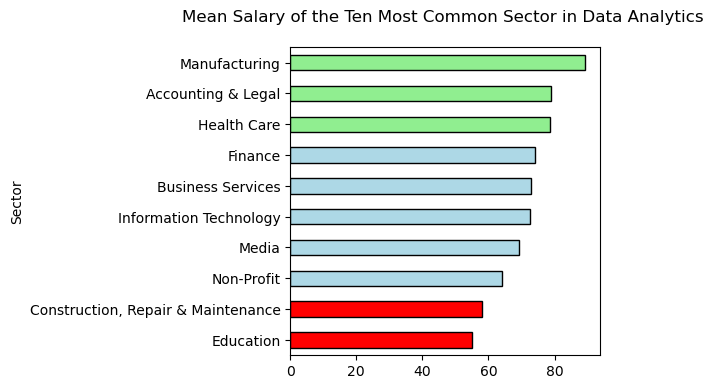

In [25]:
#Finally, we can also plot the mean salary of the ten most common sector in Data Analytics, in order to
#compare them better
plt.figure(figsize=(4,4))

Mean_salary_ten_most_common_sector=dataframe_DA_ten_most_commun_sector.groupby('Sector')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)

Mean_salary_ten_most_common_sector.sort_values().plot(kind='barh',color=['red','red','lightblue','lightblue','lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen'],ec='black')
plt.title('Mean Salary of the Ten Most Common Sector in Data Analytics \n')


In [26]:
#We can do the same work for the salaries in the ten most common industries in Data Analysis

data_DA_ten_most_commun_industry=nb_industry['Industry'].value_counts()[:10]
dataframe_DA_ten_most_commun_industry=data_DA[data_DA['Industry'].isin(data_DA_ten_most_commun_industry.index.values)]
dataframe_DA_ten_most_commun_industry.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Numerical Salary Estimate (in thousands)
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5
10,Data Analyst,$37K-$66K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,4.0,NYU Langone Health,"New York, NY","New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",-1,51.5
16,Data Analyst,$37K-$66K (Glassdoor est.),Undertone stands alone among AdTech and ad net...,3.8,Undertone,"New York, NY","New York, NY",201 to 500 employees,2001,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"DoubleClick, Specific Media, Collective",True,51.5
25,Data Analyst,$37K-$66K (Glassdoor est.),Data Analyst (Decision Science)\n\nHearst is a...,4.0,Hearst Communications,"New York, NY","San Francisco, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,Less than $1 million (USD),-1,-1,51.5
30,Data Analyst,$46K-$87K (Glassdoor est.),Our Mission\n\nMove people.\n\nOur Values\n\nW...,3.6,Revel,"Brooklyn, NY","Seattle, WA",51 to 200 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,True,66.5


Text(0.5, 1.0, 'Mean Salary of the Ten Most Common Industry in Data Analytics')

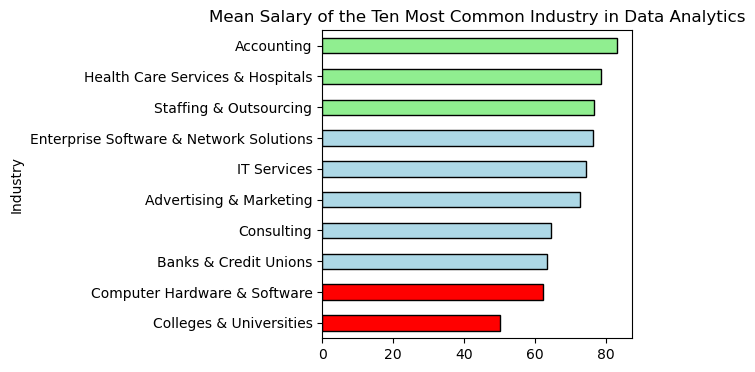

In [27]:
plt.figure(figsize=(4,4))

Mean_salary_ten_most_common_industry=dataframe_DA_ten_most_commun_industry.groupby('Industry')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)

Mean_salary_ten_most_common_industry.sort_values().plot(kind='barh',color=['red','red','lightblue','lightblue','lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen'],ec='black')
plt.title('Mean Salary of the Ten Most Common Industry in Data Analytics')


In [28]:
#It seems like sector with the highest average salary is Manufacturing. Therefore, we can take a look at the industries
#of this sector, in order to see which one has the highest average salary.

data_manufacturing=data[data['Sector']=='Manufacturing']
data_manufacturing['Industry'].value_counts()

Consumer Products Manufacturing           10
Industrial Manufacturing                   7
Electrical & Electronic Manufacturing      6
Food & Beverage Manufacturing              6
Health Care Products Manufacturing         5
Transportation Equipment Manufacturing     3
Miscellaneous Manufacturing                2
Chemical Manufacturing                     1
Name: Industry, dtype: int64

In [29]:
Mean_salary_in_manufacturing = data_manufacturing.groupby('Industry')['Numerical Salary Estimate (in thousands)'].mean()
Mean_salary_in_manufacturing.sort_values(ascending=False)

Industry
Health Care Products Manufacturing        89.800000
Transportation Equipment Manufacturing    85.000000
Electrical & Electronic Manufacturing     84.666667
Chemical Manufacturing                    73.000000
Miscellaneous Manufacturing               70.250000
Industrial Manufacturing                  67.785714
Food & Beverage Manufacturing             65.083333
Consumer Products Manufacturing           59.250000
Name: Numerical Salary Estimate (in thousands), dtype: float64

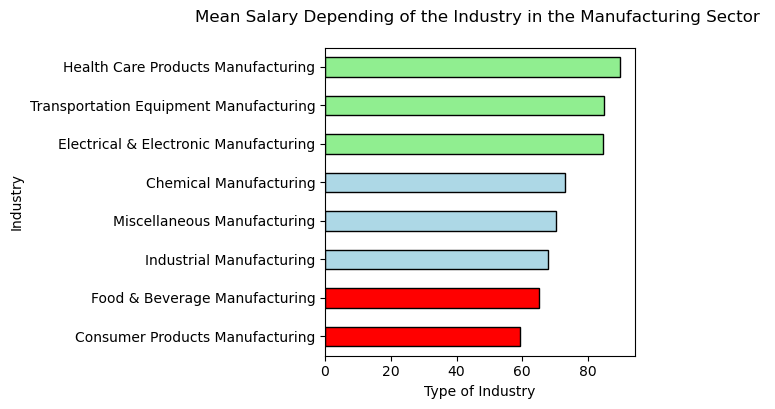

In [30]:
plt.figure(figsize=(4,4))
ax=Mean_salary_in_manufacturing.sort_values().plot(kind='barh',color=['red','red','lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen'],ec='black')
plt.title('Mean Salary Depending of the Industry in the Manufacturing Sector \n')
ax.set_xlabel('Type of Industry')

plt.show()

In [31]:
#It seems like the Health Care Products Manufacturing has the highest average salary in the Manufacturing Sector.
#Now we can wonder if the size of a company is coorelated with the salary of its employees.
#First let's take a look at all the values contained in the Size feature.

nb_company_size = data[(data['Size'] !='-1')&(data['Size'] !='Unknown')]
nb_company_size['Size'].value_counts()

51 to 200 employees        420
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
5001 to 10000 employees     97
Name: Size, dtype: int64

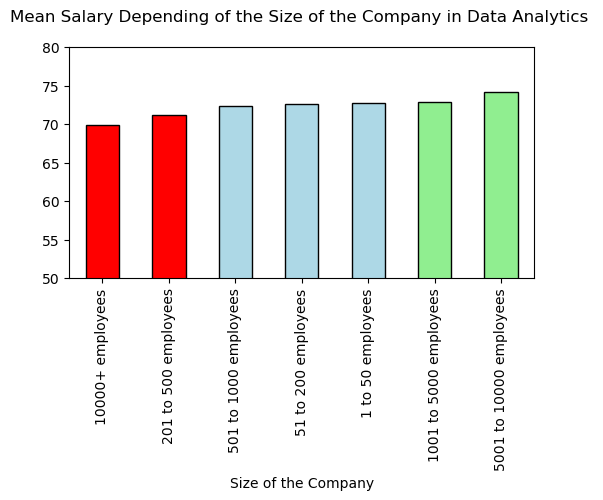

In [32]:
#Now we can plot the mean salary for each business size 

Mean_salary_for_each_company_size=nb_company_size.groupby('Size')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,3))
ax=Mean_salary_for_each_company_size.sort_values().plot(kind='bar',color=['red','red','lightblue','lightblue','lightblue','lightgreen','lightgreen'],ec='black')
plt.title('Mean Salary Depending of the Size of the Company in Data Analytics \n')
ax.set_xlabel('Size of the Company')
plt.ylim(50,80)

plt.show()

In [33]:
#It looks like the salary of a data analyst does not depend on the size of the company he is working in.
#We can also answering the question : Which companies offer in average the highest salary for its employees ?
#First we select the two columns we are interested in, which are the Company Name and the Numerical Salary Estimate (in thousands)
# columns.

company_with_salary = data.loc[:,['Company Name','Numerical Salary Estimate (in thousands)']].dropna()
company_with_salary

,Company Name,Numerical Salary Estimate (in thousands)
0,Vera Institute of Justice,51.5
1,Visiting Nurse Service of New York,51.5
2,Squarespace,51.5
3,Celerity,51.5
4,FanDuel,51.5
...,...,...
2246,Spiceorb,91.0
2247,APN Software Services Inc.,91.0
2248,"Avacend, Inc.",91.0
2249,Arrow Electronics,91.0


In [34]:
#Then we take a look at the number of occurences of each company in the dataset.

data_DA['Company Name'].value_counts()

Staffigo Technical Services, LLC    20
Diverse Lynx                         6
Kforce                               5
Robert Half                          5
Randstad                             4
                                    ..
Peterson Technology Partners         1
CRS Group                            1
Swoon                                1
University of Chicago                1
xentity corporation                  1
Name: Company Name, Length: 340, dtype: int64

In [35]:
#And get the list of the companies that have the best average salary in general, which is 150k per year.
company_with_their_mean_salary=data_DA.groupby('Company Name')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)
print('The companies with the best salaries for the profession of data analyst are \n\n',company_with_their_mean_salary[company_with_their_mean_salary.values == 150.0])


The companies with the best salaries for the profession of data analyst are 

 Company Name
L&T Infotech        150.0
Logic Planet        150.0
BayOne Solutions    150.0
Tesla Motors        150.0
Connor Group        150.0
Enjoy               150.0
Xcutives.com Inc    150.0
Zipongo             150.0
OSI Engineering     150.0
Iconma, L.L.C.      150.0
LeanData            150.0
Kaygen Inc.         150.0
IntraEdge           150.0
Name: Numerical Salary Estimate (in thousands), dtype: float64


In [36]:
#We can also get the companies with the lowest average salary. Here, the treshold is 45k per year
print('The companies with the lowest salaries for the profession of data analyst are \n\n',company_with_their_mean_salary[company_with_their_mean_salary.values < 45.0])


The companies with the lowest salaries for the profession of data analyst are 

 Company Name
Andiamo                                         42.5
University of Florida                           42.0
Trinity Industries                              41.5
Corporate G. LLC                                41.5
1                                               41.5
First American Financial Corporation            41.5
Sphinix Solutions                               41.5
Randstad US                                     41.5
Financial Additions                             41.5
StaffingSoft Inc.                               41.5
AccessLex Institute                             40.5
ORS Partners                                    40.5
Piper Companies                                 40.5
Zachary Piper Solutions, LLC                    40.5
Login Consulting Services, Inc                  40.5
Angeion Group                                   40.5
iTech Solutions, Inc                            40.5
DL St

Text(0, 0.5, 'Salary Estimate \n in thousands')

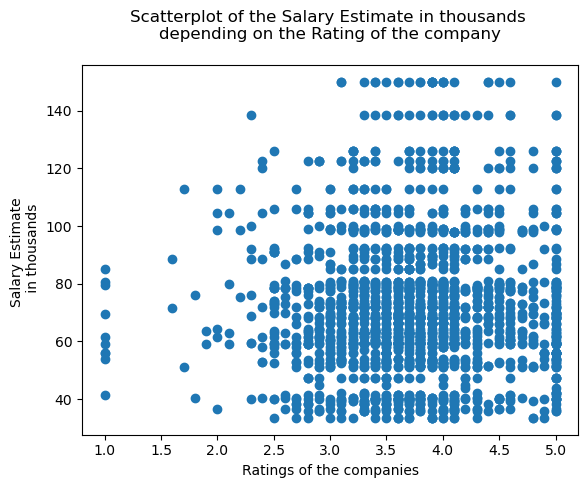

In [37]:
#Finally, we can wonder if a coorelation exists between the salary of an employee and the company rating
#of the company where he is working in.
Rating_plot=data[data['Rating']!=-1.0]
plt.scatter(Rating_plot['Rating'],Rating_plot['Numerical Salary Estimate (in thousands)'])
plt.title('Scatterplot of the Salary Estimate in thousands \ndepending on the Rating of the company\n')
plt.xlabel('Ratings of the companies')
plt.ylabel('Salary Estimate \n in thousands')

In [38]:
#It seems there is no real coorelation between the Rating of a company and the salary a data analsyt can get.

#Finally, we can do the same work depending on the Revenue of the different companies.
#First, we can take a look at the number of companies belonging to each group of revenues.
nb_company_revenue = data[data['Revenue'] !='-1']
nb_revenue_value=nb_company_revenue['Revenue'].value_counts()[:30]
nb_revenue_value

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            109
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [39]:
#First, we order the index of the Series by the Revenue in ascending order, and we delete the 'Unknown / Non-Applicable' value,
#which is irrelvant for our analysis
index=pd.Series(['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)','$10 to $25 million (USD)','$25 to $50 million (USD)','$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)','$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)','Unknown / Non-Applicable'])
nb_revenue_sorted = nb_revenue_value.reindex(index=index)
nb_revenue_sorted = nb_revenue_sorted[nb_revenue_sorted.index != 'Unknown / Non-Applicable' ]
nb_revenue_sorted

Less than $1 million (USD)           93
$1 to $5 million (USD)              111
$5 to $10 million (USD)              72
$10 to $25 million (USD)            132
$25 to $50 million (USD)            109
$50 to $100 million (USD)           199
$100 to $500 million (USD)          218
$500 million to $1 billion (USD)     79
$1 to $2 billion (USD)               87
$2 to $5 billion (USD)              129
$5 to $10 billion (USD)              56
$10+ billion (USD)                  189
Name: Revenue, dtype: int64

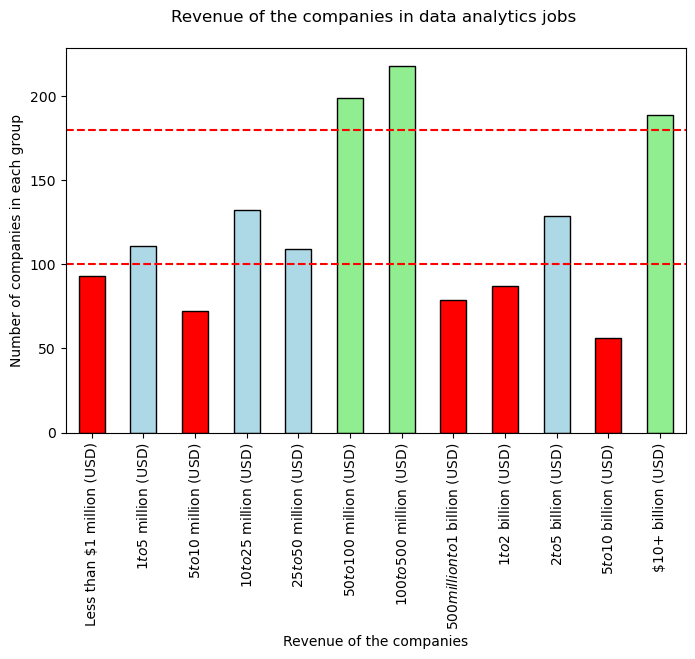

In [40]:
#Then we can make a histogram of the count of companies in each subgroup of Revenue we have
plt.figure(figsize=(8,5))
nb_revenue_sorted.plot(kind='bar',color=['red','lightblue','red','lightblue','lightblue','lightgreen','lightgreen','red','red','lightblue','red','lightgreen'],ec='black')
plt.title('Revenue of the companies in data analytics jobs \n')
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.axhline(y = 180, color = 'r', linestyle = '--')
plt.xlabel('Revenue of the companies')
plt.ylabel('Number of companies in each group')

plt.show()



In [41]:
#In order to take a look at the average salary of a data analyst depending on the Revenue of the company he is working in,
#We have to select the Revenue and the Numerical Salary Estimate (in thousands) columns.
data_DA_revenue=data.loc[:,['Revenue','Numerical Salary Estimate (in thousands)']]
data_DA_revenue=data_DA_revenue[data_DA_revenue!="-1"]
data_DA_revenue=data_DA_revenue[data_DA_revenue!="Unknown / Non-Applicable"]
data_DA_revenue=data_DA_revenue.dropna()
data_DA_revenue.head()

,Revenue,Numerical Salary Estimate (in thousands)
0,$100 to $500 million (USD),51.5
1,$2 to $5 billion (USD),51.5
3,$50 to $100 million (USD),51.5
4,$100 to $500 million (USD),51.5
7,$100 to $500 million (USD),51.5


In [42]:
#Then we can group by the values in the Revenue columnn, and order the index in the same way as before
data_DA_revenue_mean=data_DA_revenue.groupby('Revenue')['Numerical Salary Estimate (in thousands)'].mean()
index2=pd.Series(['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)','$10 to $25 million (USD)','$25 to $50 million (USD)','$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)','$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)'])
data_DA_revenue_mean_sorted = data_DA_revenue_mean.reindex(index=index2)
data_DA_revenue_mean_sorted

Less than $1 million (USD)          70.903226
$1 to $5 million (USD)              75.972973
$5 to $10 million (USD)             70.451389
$10 to $25 million (USD)            70.647727
$25 to $50 million (USD)            74.384259
$50 to $100 million (USD)           68.972362
$100 to $500 million (USD)          71.754587
$500 million to $1 billion (USD)    69.594937
$1 to $2 billion (USD)              70.327586
$2 to $5 billion (USD)              71.671875
$5 to $10 billion (USD)             73.732143
$10+ billion (USD)                  70.582011
Name: Numerical Salary Estimate (in thousands), dtype: float64

Text(0.5, 1.0, 'Data analysts average income depending on the Revenue \nof the companies they are working in \n')

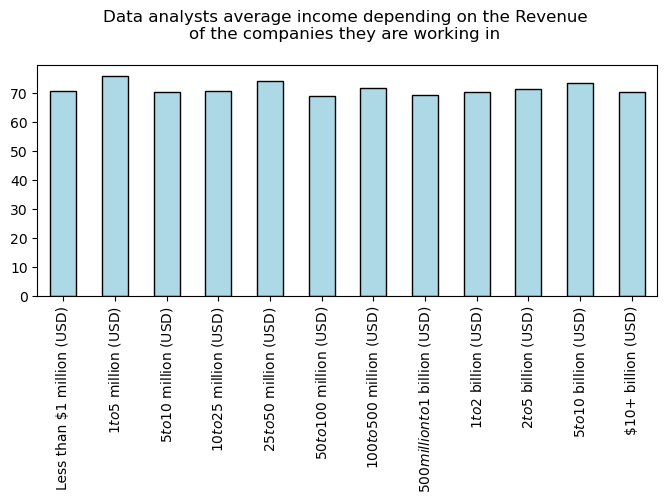

In [43]:
#Finally, we can plot the Data analysts average income depending on the Revenue 
#of the companies they are working in 
plt.figure(figsize=(8,3))
data_DA_revenue_mean_sorted.plot(kind='bar',color='lightblue',ec='black')
plt.title('Data analysts average income depending on the Revenue \nof the companies they are working in \n')

In [44]:
#At last, we can perform the same process with the Location column
company_location_with_their_mean_salary=data_DA.groupby('Location')['Numerical Salary Estimate (in thousands)'].mean().sort_values(ascending=False)
print("Top ten Data Analyst Mean Salary depending on the Location of their companies \n",company_location_with_their_mean_salary[:10])
print("Last ten Data Analyst Mean Salary depending on the Location of their companies \n",company_location_with_their_mean_salary[99:])

Top ten Data Analyst Mean Salary depending on the Location of their companies 
 Location
Fremont, CA                150.000000
Newark, CA                 150.000000
Berkeley, CA               138.500000
San Jose, CA               130.533333
Santa Clara, CA            129.500000
Sunnyvale, CA              126.571429
Marin City, CA             126.000000
Daly City, CA              126.000000
South San Francisco, CA    126.000000
Foster City, CA            126.000000
Name: Numerical Salary Estimate (in thousands), dtype: float64
Last ten Data Analyst Mean Salary depending on the Location of their companies 
 Location
Horsham, PA           40.5
Allegheny West, PA    40.5
West Chester, PA      40.5
Newtown, PA           40.5
Columbus, OH          40.0
Dallas, TX            39.3
West Jordan, UT       36.5
Salt Lake City, UT    36.5
Houston, TX           36.3
Stafford, TX          33.5
Name: Numerical Salary Estimate (in thousands), dtype: float64


Text(0.5, 1.0, 'Top ten Data Analyst Mean Salary depending on the Location of their companies \n')

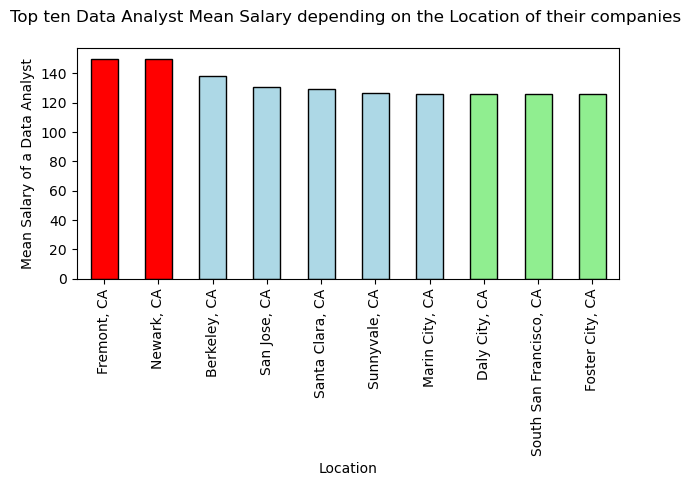

In [45]:
#And with two different plots
plt.figure(figsize=(7,3))
First_ten_companies = company_location_with_their_mean_salary[:10]
First_ten_companies.plot(kind='bar',color=['red','red','lightblue','lightblue','lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen'],ec='black')
plt.ylabel('Mean Salary of a Data Analyst')
plt.title('Top ten Data Analyst Mean Salary depending on the Location of their companies \n')

Text(0.5, 1.0, 'Last ten Data Analyst Mean Salary depending on the Location of their companies \n')

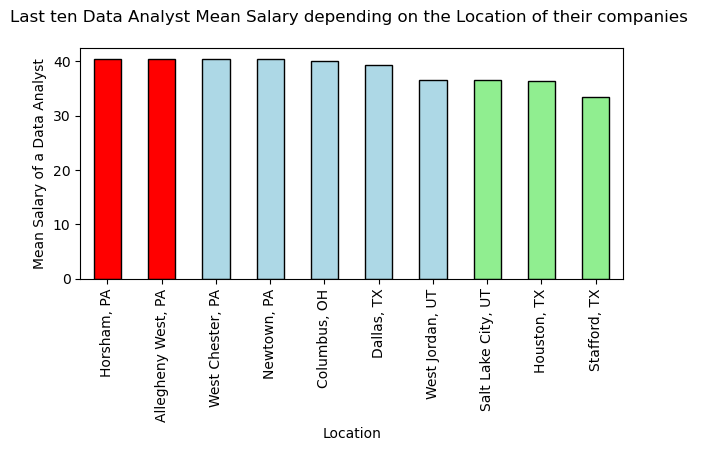

In [46]:
plt.figure(figsize=(7,3))
Last_ten_companies = company_location_with_their_mean_salary[99:]
Last_ten_companies.plot(kind='bar',color=['red','red','lightblue','lightblue','lightblue','lightblue','lightblue','lightgreen','lightgreen','lightgreen'],ec='black')
plt.ylabel('Mean Salary of a Data Analyst')
plt.title('Last ten Data Analyst Mean Salary depending on the Location of their companies \n')

In [47]:
#To conclude with, this analysis shows us that :
# - The salary of a Data Analyst is not coorelated with the Size, the Revenue or the Rating of the
# company he is working in 
# - Most of the salaries of a Data Analyst are between 60K and 80k per year
# - A data analyst who works in the Manufacturing sector, the Accounting & Legal sector or
# the Health Care sector is more likely to get a higher salary
# - A data analyst who works in the Accounting industry, Health Care Services & Hospitals industry or 
# Staffing & Outsourcing industry is more likely to get a higher salary
# - And on average, being a Lead Data Analyst or a Business Data Analyst gives you also a higher salary

#However, we have to be careful with this analysis, since the dataset contained only 2252 entries, which is a very small
#amount of the number of data analysts who currently work in the United States, which is 242,562 in 2023, according to the
#website www.zippia.com. In order to be sure of the results coming from our analysis, we should get more data. 
